In [ ]:
import pandas as pd
import numpy as np
import datetime
import plotly.graph_objs as go

In [ ]:
dados_diarios = pd.read_csv("/content/medias_moveis.csv")
dados_diarios.head()

,Unnamed: 0,ADAMANTINA,ADOLFO,AGUAÍ,ÁGUAS DA PRATA,ÁGUAS DE LINDÓIA,ÁGUAS DE SANTA BÁRBARA,ÁGUAS DE SÃO PEDRO,AGUDOS,ALAMBARI,ALFREDO MARCONDES,ALTAIR,ALTINÓPOLIS,ALTO ALEGRE,ALUMÍNIO,ÁLVARES FLORENCE,ÁLVARES MACHADO,ÁLVARO DE CARVALHO,ALVINLÂNDIA,AMERICANA,AMÉRICO BRASILIENSE,AMÉRICO DE CAMPOS,AMPARO,ANALÂNDIA,ANDRADINA,ANGATUBA,ANHEMBI,ANHUMAS,APARECIDA,APARECIDA D'OESTE,APIAÍ,ARAÇARIGUAMA,ARAÇATUBA,ARAÇOIABA DA SERRA,ARAMINA,ARANDU,ARAPEÍ,ARARAQUARA,ARARAS,ARCO-ÍRIS,...,TEJUPÁ,TEODORO SAMPAIO,TERRA ROXA,TIETÊ,TIMBURI,TORRE DE PEDRA,TORRINHA,TRABIJU,TREMEMBÉ,TRÊS FRONTEIRAS,TUIUTI,TUPÃ,TUPI PAULISTA,TURIÚBA,TURMALINA,UBARANA,UBATUBA,UBIRAJARA,UCHOA,UNIÃO PAULISTA,URÂNIA,URU,URUPÊS,VALENTIM GENTIL,VALINHOS,VALPARAÍSO,VARGEM,VARGEM GRANDE DO SUL,VARGEM GRANDE PAULISTA,VÁRZEA PAULISTA,VERA CRUZ,VINHEDO,VIRADOURO,VISTA ALEGRE DO ALTO,VITÓRIA BRASIL,VOTORANTIM,VOTUPORANGA,ZACARIAS,CHAVANTES,ESTIVA GERBI
0,2021-02-20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2021-02-21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2021-02-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2021-02-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2021-02-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
dados_semanais = pd.read_csv("/content/medias_moveis_semanal.csv")
dados_semanais.head()

,Unnamed: 0,ADAMANTINA,ADOLFO,AGUAÍ,ÁGUAS DA PRATA,ÁGUAS DE LINDÓIA,ÁGUAS DE SANTA BÁRBARA,ÁGUAS DE SÃO PEDRO,AGUDOS,ALAMBARI,ALFREDO MARCONDES,ALTAIR,ALTINÓPOLIS,ALTO ALEGRE,ALUMÍNIO,ÁLVARES FLORENCE,ÁLVARES MACHADO,ÁLVARO DE CARVALHO,ALVINLÂNDIA,AMERICANA,AMÉRICO BRASILIENSE,AMÉRICO DE CAMPOS,AMPARO,ANALÂNDIA,ANDRADINA,ANGATUBA,ANHEMBI,ANHUMAS,APARECIDA,APARECIDA D'OESTE,APIAÍ,ARAÇARIGUAMA,ARAÇATUBA,ARAÇOIABA DA SERRA,ARAMINA,ARANDU,ARAPEÍ,ARARAQUARA,ARARAS,ARCO-ÍRIS,...,TEJUPÁ,TEODORO SAMPAIO,TERRA ROXA,TIETÊ,TIMBURI,TORRE DE PEDRA,TORRINHA,TRABIJU,TREMEMBÉ,TRÊS FRONTEIRAS,TUIUTI,TUPÃ,TUPI PAULISTA,TURIÚBA,TURMALINA,UBARANA,UBATUBA,UBIRAJARA,UCHOA,UNIÃO PAULISTA,URÂNIA,URU,URUPÊS,VALENTIM GENTIL,VALINHOS,VALPARAÍSO,VARGEM,VARGEM GRANDE DO SUL,VARGEM GRANDE PAULISTA,VÁRZEA PAULISTA,VERA CRUZ,VINHEDO,VIRADOURO,VISTA ALEGRE DO ALTO,VITÓRIA BRASIL,VOTORANTIM,VOTUPORANGA,ZACARIAS,CHAVANTES,ESTIVA GERBI
0,2021-02-20,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2021-02-27,36.285714,0.142857,4.285714,0.000000,3.571429,0.857143,4.857143,43.857143,0.571429,0.142857,0.000000,26.571429,3.714286,3.571429,2.285714,22.000000,1.285714,0.571429,295.285714,44.000000,0.000000,16.857143,2.714286,88.714286,5.428571,2.428571,8.428571,138.142857,-3.571429,2.285714,-260.000000,373.857143,26.285714,0.285714,2.000000,-444.571429,298.285714,220.285714,17.428571,...,25.285714,-46.857143,51.428571,-2.571429,-141.428571,-21.714286,0.571429,96.571429,23.285714,-57.714286,176.142857,112.285714,8.857143,-15.285714,3.571429,82.285714,35.714286,-186.285714,-39.714286,10.428571,-68.857143,5.571429,-62.000000,192.142857,109.857143,20.857143,87.571429,108.285714,5.285714,-247.142857,85.285714,62.857143,12.142857,4.571429,165.857143,361.285714,23.714286,12.428571,18.857143,1.142857
2,2021-03-06,247.571429,14.285714,102.285714,46.000000,11.571429,26.142857,18.000000,142.000000,15.285714,23.428571,19.857143,47.571429,20.000000,35.285714,25.571429,76.285714,9.857143,11.142857,488.285714,77.571429,22.428571,190.285714,17.142857,63.142857,45.142857,13.857143,15.714286,55.714286,25.142857,79.428571,33.571429,782.142857,41.000000,13.000000,23.000000,5.000000,634.857143,545.142857,10.000000,...,-12.714286,86.000000,5.571429,191.428571,7.428571,2.428571,55.857143,-91.000000,241.714286,37.714286,-150.142857,365.285714,109.857143,11.857143,13.857143,-68.285714,306.714286,6.142857,73.857143,-7.714286,72.857143,-5.000000,63.142857,-147.000000,412.000000,115.285714,-61.285714,289.000000,2.285714,242.714286,-34.428571,195.285714,72.142857,35.857143,-155.428571,-62.142857,719.000000,-2.142857,24.000000,21.000000
3,2021-03-13,109.857143,11.571429,63.428571,35.000000,76.428571,16.571429,24.142857,32.714286,7.571429,24.857143,3.142857,11.142857,11.857143,18.857143,12.142857,45.428571,6.571429,7.142857,428.142857,41.857143,24.142857,219.571429,5.000000,203.571429,9.571429,13.714286,7.714286,81.428571,20.428571,44.000000,5.714286,574.285714,106.142857,16.000000,9.571429,9.714286,1129.142857,256.857143,2.857143,...,7.571429,48.428571,24.857143,80.714286,7.428571,4.857143,21.428571,2.857143,79.714286,16.857143,24.571429,130.285714,45.428571,6.000000,3.285714,4.714286,152.142857,22.428571,43.000000,5.571429,25.857143,3.000000,45.714286,25.857143,150.714286,33.428571,17.285714,97.571429,93.142857,129.571429,37.857143,134.571429

In [ ]:
dados_diarios.rename(columns = {'Unnamed: 0': 'Data'}, inplace=True)
dados_diarios.columns

Index(['Data', 'ADAMANTINA', 'ADOLFO', 'AGUAÍ', 'ÁGUAS DA PRATA',
       'ÁGUAS DE LINDÓIA', 'ÁGUAS DE SANTA BÁRBARA', 'ÁGUAS DE SÃO PEDRO',
       'AGUDOS', 'ALAMBARI',
       ...
       'VERA CRUZ', 'VINHEDO', 'VIRADOURO', 'VISTA ALEGRE DO ALTO',
       'VITÓRIA BRASIL', 'VOTORANTIM', 'VOTUPORANGA', 'ZACARIAS', 'CHAVANTES',
       'ESTIVA GERBI'],
      dtype='object', length=646)

In [ ]:
dados_semanais.rename(columns = {'Unnamed: 0': 'Data'}, inplace=True)
dados_semanais.columns

Index(['Data', 'ADAMANTINA', 'ADOLFO', 'AGUAÍ', 'ÁGUAS DA PRATA',
       'ÁGUAS DE LINDÓIA', 'ÁGUAS DE SANTA BÁRBARA', 'ÁGUAS DE SÃO PEDRO',
       'AGUDOS', 'ALAMBARI',
       ...
       'VERA CRUZ', 'VINHEDO', 'VIRADOURO', 'VISTA ALEGRE DO ALTO',
       'VITÓRIA BRASIL', 'VOTORANTIM', 'VOTUPORANGA', 'ZACARIAS', 'CHAVANTES',
       'ESTIVA GERBI'],
      dtype='object', length=646)

In [ ]:
dados_semanais.mean()

ADAMANTINA          220.595238
ADOLFO               28.769841
AGUAÍ               208.412698
ÁGUAS DA PRATA       49.924603
ÁGUAS DE LINDÓIA    117.869048
                       ...    
VOTORANTIM          624.011905
VOTUPORANGA         603.238095
ZACARIAS             15.900794
CHAVANTES            73.250000
ESTIVA GERBI         63.071429
Length: 645, dtype: float64

In [ ]:
print(f"O primeiro dia registrado: {dados_diarios['Data'].min()}")
print(f"O ultimo dia registrado: {dados_diarios['Data'].max()}")

O primeiro dia registrado: 2021-02-20
O ultimo dia registrado: 2021-10-24


In [ ]:
start_date = dados_diarios['Data'].min()
end_date = dados_diarios['Data'].max()

In [ ]:
sp = dados_diarios[['Data', 'SÃO PAULO']]
sp.shape

(247, 2)

In [ ]:
sjc = dados_diarios[['Data', 'SÃO JOSÉ DOS CAMPOS']]
sjc.shape

(247, 2)

In [ ]:
itap = dados_diarios[['Data', 'ITAPECERICA DA SERRA']]
itap.shape

(247, 2)

In [ ]:
max_vacinacao = sp['SÃO PAULO'].max()
min_vacinacao = sp['SÃO PAULO'].min()
print(f"Maximo de doses aplicadas: {max_vacinacao}")
print(f"Minimo de doses aplicadas: {min_vacinacao}")

Maximo de doses aplicadas: 208455.8571428572
Minimo de doses aplicadas: -20830.85714285714


In [ ]:
sete_dias = datetime.timedelta(days=7)
start_date = str(pd.to_datetime(dados_diarios['Data'].max())-datetime.timedelta(days=7))
end_date = str(dados_diarios['Data'].max())

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=sp['Data'], y=sp['SÃO PAULO'],
                    mode='lines',
                    name='N° Vacinas - SP', line = dict(color='#4682B4',width=5.5)))

fig.add_trace(go.Scatter(x=sjc['Data'], y=sjc['SÃO JOSÉ DOS CAMPOS'],
                    mode='lines',
                    name='N° Vacinas - SJC', line=dict(color='#7FFFD4', width=4.5)))

fig.add_trace(go.Scatter(x=itap['Data'], y=itap['ITAPECERICA DA SERRA'],
                    mode='lines',
                    name='N° Vacinas - ITAP', line=dict(color='orange', width=4.5)))


fig.update_xaxes(tickangle = 45, color='black', tickfont=dict(size=20), tickwidth=4)

fig.update_yaxes(visible=False)

fig.update_layout(title=dict(text='Quantidade média de Vacinas aplicadas por dia na cidade de São Paulo', font=dict(size=22, color="black")),
                  legend=dict(
                    x=0.32,
                    y=-0.4,
                    traceorder="reversed",
                    font=dict(
                        size=18,
                        color="black"
                    ),
                ), legend_orientation="h", shapes=[dict(type="rect", xref="x", yref="y",
            x0=start_date, x1=end_date, y0=0, y1=max_vacinacao, line_width=3, fillcolor='orange', opacity=0.35, layer='below')], paper_bgcolor='rgba(255,255,255,255)',
     plot_bgcolor='rgba(0,0,0,0)')


fig.show()

#Testes cidades similares

In [ ]:
uru = dados_diarios[['Data', 'URU']]
uru.shape

(247, 2)

In [ ]:
flora = dados_diarios[['Data', 'FLORA RICA']]
flora.shape

(247, 2)

In [ ]:
bora = dados_diarios[['Data', 'BORÁ']]
bora.shape

(247, 2)

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=bora['Data'], y=bora['BORÁ'],
                    mode='lines',
                    name='N° Vacinas - Borá', line=dict(color='orange', width=4.5)))

fig.add_trace(go.Scatter(x=uru['Data'], y=uru['URU'],
                    mode='lines',
                    name='N° Vacinas - Uru', line = dict(color='#4682B4',width=5.5)))

fig.add_trace(go.Scatter(x=flora['Data'], y=flora['FLORA RICA'],
                    mode='lines',
                    name='N° Vacinas - Flora Rica', line=dict(color='#7FFFD4', width=4.5)))


fig.update_xaxes(tickangle = 45, color='black', tickfont=dict(size=20), tickwidth=4)

fig.update_yaxes(visible=False)

fig.update_layout(title=dict(text='Quantidade média de Vacinas aplicadas por dia na cidade de São Paulo', font=dict(size=22, color="black")),
                  legend=dict(
                    x=0.32,
                    y=-0.4,
                    traceorder="reversed",
                    font=dict(
                        size=18,
                        color="black"
                    ),
                ), legend_orientation="h", shapes=[dict(type="rect", xref="x", yref="y",
            x0=start_date, x1=end_date, y0=0, y1=50, line_width=3, fillcolor='orange', opacity=0.35, layer='below')], paper_bgcolor='rgba(255,255,255,255)',
     plot_bgcolor='rgba(0,0,0,0)')


fig.show()

#Plot de Recorrência

In [ ]:
import seaborn as sns

import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform

In [ ]:
sns.set()

##Cidade de URU

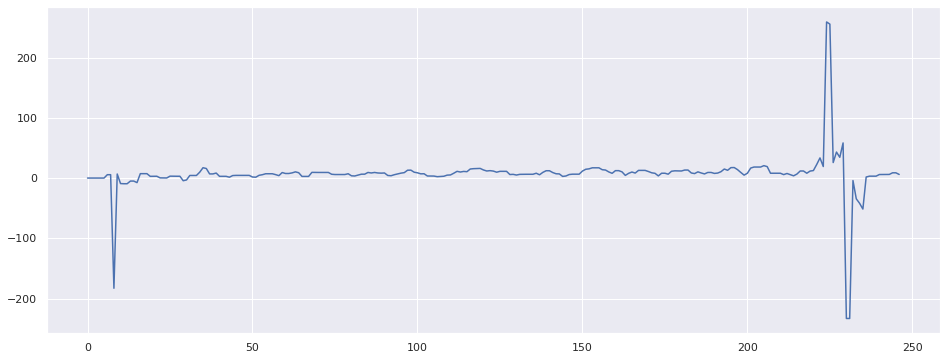

In [ ]:
uru['URU'].plot(figsize=(16,6))

In [ ]:
def rec_plot(s, eps=0.10, steps=10):
    d = pdist(s[:,None])
    d = np.floor(d/eps)
    d[d>steps] = steps
    Z = squareform(d)
    return Z

In [ ]:
a = []

a.append(rec_plot(uru['URU'], eps=0.10))
a.append(rec_plot(uru['URU'], eps=0.30))
a.append(rec_plot(uru['URU'], eps=0.60))
a.append(rec_plot(uru['URU'], eps=0.80))
a.append(rec_plot(uru['URU'], eps=5))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



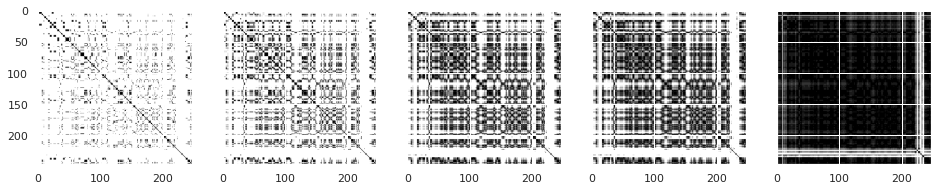

In [ ]:
fig, axs = plt.subplots(1, len(a), figsize=(16, 4), sharey=True)

for i, obj in enumerate(a):
    axs[i].imshow(obj, cmap='gray')

##Borá

In [ ]:
c = []

c.append(rec_plot(bora['BORÁ'], eps=0.10))
c.append(rec_plot(bora['BORÁ'], eps=0.30))
c.append(rec_plot(bora['BORÁ'], eps=0.60))
c.append(rec_plot(bora['BORÁ'], eps=0.80))
c.append(rec_plot(bora['BORÁ'], eps=5))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



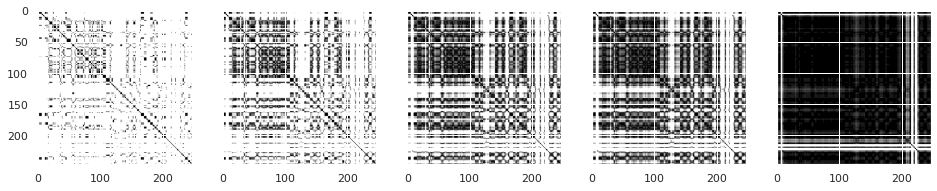

In [ ]:
fig, axs = plt.subplots(1, len(c), figsize=(16, 4), sharey=True)

for i, obj in enumerate(c):
    axs[i].imshow(obj, cmap='gray')

##São José dos Campos

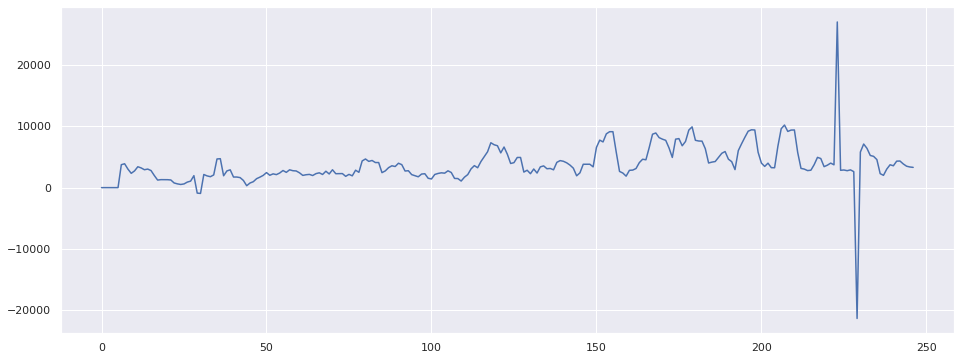

In [ ]:
sjc['SÃO JOSÉ DOS CAMPOS'].plot(figsize=(16,6))

In [ ]:
b = []

b.append(rec_plot(sjc['SÃO JOSÉ DOS CAMPOS'], eps=0.10))
b.append(rec_plot(sjc['SÃO JOSÉ DOS CAMPOS'], eps=0.30))
b.append(rec_plot(sjc['SÃO JOSÉ DOS CAMPOS'], eps=0.60))
b.append(rec_plot(sjc['SÃO JOSÉ DOS CAMPOS'], eps=0.80))
b.append(rec_plot(sjc['SÃO JOSÉ DOS CAMPOS'], eps=5))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



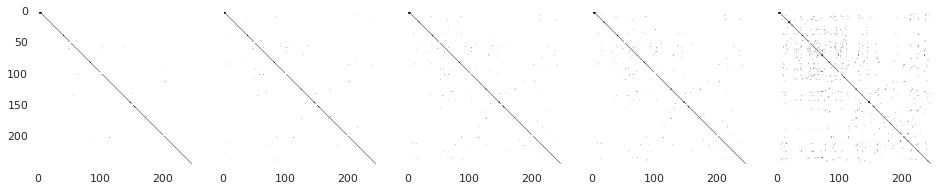

In [ ]:
fig, axs = plt.subplots(1, len(b), figsize=(16, 4), sharey=True)

for i, obj in enumerate(b):
    axs[i].imshow(obj, cmap='gray')